# importing libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


# reading files

In [25]:
files_df = []
files = ["C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_January_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_February_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_July_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_June_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_March_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_May_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_November_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_October_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_September_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_April_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_August_2019.csv","C:/Users/ASUS/Downloads/New folder (2)/Sales_Data/Sales_Data/Sales_December_2019.csv"]

for i in files:
    df1= pd.read_csv(i)
    files_df.append(df1)
df = pd.concat(files_df)

df
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# dropping NaN

In [26]:
new_df = df.dropna()
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [28]:
#confirming if NaN has been dropped
new_df.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

# The best month of sales

### To get the best month of sales, we'll create a new column 'Month' from the 'Order Date' column,Group the DataFrame by the 'Month' column and calculate the sum of the 'Sales' column, then Identify the month with the highest sales.
 

The best month of sales is December.


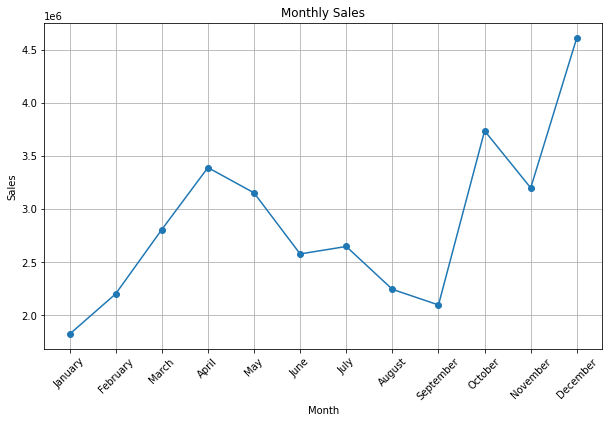

In [69]:
new_df.loc[:,'Quantity Ordered']=pd.to_numeric(new_df['Quantity Ordered'], errors = 'coerce')
new_df.loc[:,'Price Each']=pd.to_numeric(new_df['Price Each'], errors = 'coerce')
new_df['Sales']=new_df['Quantity Ordered']*new_df['Price Each']

new_df = new_df.loc[new_df['Order Date']!='Order Date']
new_df['Order Date']= pd.to_datetime(new_df['Order Date'],format = '%m/%d/%y %H:%M')
new_df['Month']=new_df['Order Date'].dt.month
new_dfsales_per_month = new_df.groupby('Month')['Sales'].sum()
best_month_of_sales= sales_per_month.idxmax()
the_months = {1:'January',
              2:'February',
              3:'March',
              4:'April',
              5:'May',
              6:'June',
              7:'July',
              8:'August',
              9:'September',
              10:'October',
              11:'November',
              12:'December'}
best_month_word = the_months[best_month_of_sales]
print(f"The best month of sales is {best_month_word}.")

plt.figure(figsize=(10, 6))
plt.plot(new_dfsales_per_month.index, new_dfsales_per_month.values, marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(True)
plt.show()


# what city sold the most products?

The city that sold the most products is  San Francisco.


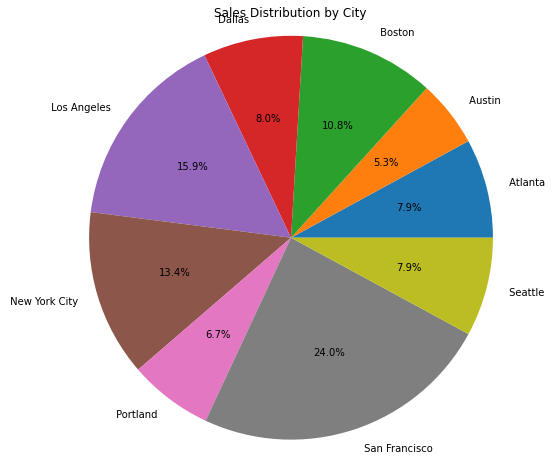

In [70]:
# extracting the city from the purchase Address column
new_df['City']= new_df['Purchase Address'].apply(lambda x: x.split(',')[1])
# grouping the purchase by city
sales_per_city = new_df.groupby('City')['Quantity Ordered'].sum()
best_selling_city = sales_per_city.idxmax()
print(f"The city that sold the most products is {best_selling_city}.")

plt.figure(figsize=(8, 8))
plt.pie(sales_per_city, labels=sales_per_city.index, autopct='%1.1f%%')
plt.title('Sales Distribution by City')
plt.axis('equal')
plt.show()

# what time should we display advertisement to maximize the likelihood of customers liking a product?

The best time to display advertisements is 19:00.


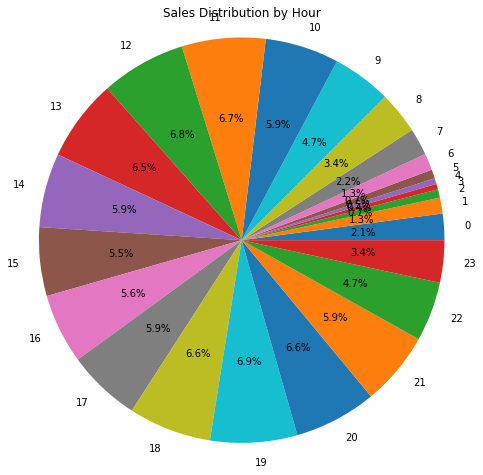

In [72]:
# we'll extract the hour from the order date, group by hour and calculate the average sales, then get the max
new_df['Hour']=new_df['Order Date'].dt.hour
sales_per_hour= new_df.groupby('Hour')['Order ID'].count()
best_sales_hour =sales_per_hour.idxmax()
print(f"The best time to display advertisements is {best_sales_hour}:00.")

plt.figure(figsize=(8, 8))
plt.pie(sales_per_hour, labels=sales_per_hour.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Hour')
plt.axis('equal')
plt.show()

# what products are most often sold together

In [76]:

# Grouping products by Order ID and creating a list of products for each order
order_products = df.groupby('Order ID')['Product'].apply(list)
# Creating a new DataFrame with products as columns and orders as rows
transaction_df = pd.get_dummies(order_products.apply(pd.Series).stack()).sum(level=0)
# Calculating the correlation matrix
correlation_matrix = transaction_df.corr()
# Finding the products with the highest correlations
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
# Print the top 5 product pairs with the highest correlations
top_product_pairs = top_correlations.head(5)
print(top_product_pairs)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1496\4290995335.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  transaction_df = pd.get_dummies(order_products.apply(pd.Series).stack()).sum(level=0)


20in Monitor            20in Monitor              1.0
LG Dryer                LG Dryer                  1.0
34in Ultrawide Monitor  34in Ultrawide Monitor    1.0
AA Batteries (4-pack)   AA Batteries (4-pack)     1.0
AAA Batteries (4-pack)  AAA Batteries (4-pack)    1.0
dtype: float64


# what product sold the most?

In [67]:

# Grouping the DataFrame by Product and calculating the total quantity ordered for each product
product_sales = new_df.groupby('Product')['Quantity Ordered'].sum()

best_selling_product = product_sales.idxmax()

print(f"The product that sold the most is: {best_selling_product}")
# why do you think it sold?


The product that sold the most is: AAA Batteries (4-pack)
